In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_colwidth', -1)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import csv
import urllib
import time

#Exploratory Data Analysis

Before beginning in-depth modeling, it's good to get a sense of what our data looks like. Perhaps we can see what variables seem to have relationships with one another which can forma a basis for predictive modeling.

##Visualizing the Air Pollutant Data

In [21]:
#Load in the 3 US datasets
YearDat = pd.read_csv('YearDat.csv')
MonthDat = pd.read_csv('MonthDat.csv')
SeasonDat = pd.read_csv('SeasonDat.csv')

One of the best first steps is the get a sense the distribution of the various variables in the dataset. We can start by looking at the distribution of the several pollutants in our dataset to see how they vary by site. To begin with, just looking at yearly averages gives a general sense of how these pollutants fall across sites.

In [15]:
#Generate a mapper to get Month Labels for plots
mapper = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
MonthDatMapped = MonthDat.copy()
MonthDatMapped['Month']=MonthDatMapped['month'].map(mapper.get)

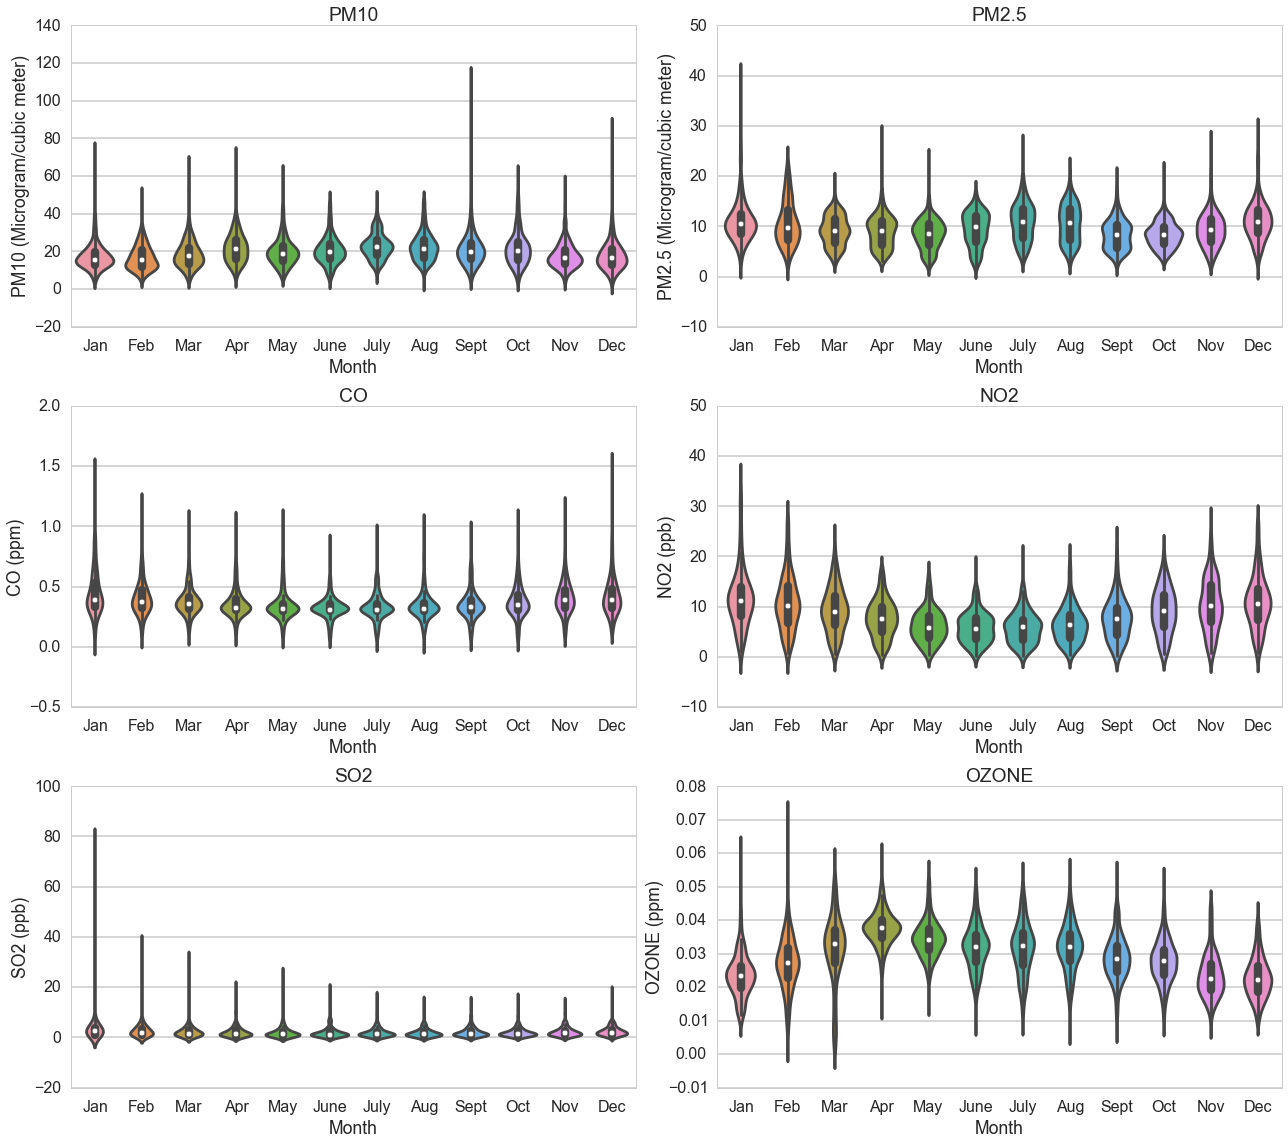

In [10]:
#Create 6 plots, one for each pollutant
#Then make a violin-plot of that pollutant
#for each month
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16))
fig.set_tight_layout(True)
sns.violinplot(x='Month',y='PM10',data=MonthDatMapped, ax = axes[0,0])
axes[0,0].set_title('PM10')
axes[0,0].set_ylabel('PM10 (Microgram/cubic meter)')
sns.violinplot(x='Month',y='PM25_FRMFEM',data=MonthDatMapped, ax = axes[0,1])
axes[0,1].set_title('PM2.5')
axes[0,1].set_ylabel('PM2.5 (Microgram/cubic meter)')
sns.violinplot(x='Month',y='CO',data=MonthDatMapped, ax = axes[1,0])
axes[1,0].set_title('CO')
axes[1,0].set_ylabel('CO (ppm)')
sns.violinplot(x='Month',y='NO2',data=MonthDatMapped, ax = axes[1,1])
axes[1,1].set_title('NO2')
axes[1,1].set_ylabel('NO2 (ppb)')
sns.violinplot(x='Month',y='SO2',data=MonthDatMapped, ax = axes[2,0])
axes[2,0].set_title('SO2')
axes[2,0].set_ylabel('SO2 (ppb)')
sns.violinplot(x='Month',y='OZONE',data=MonthDatMapped, ax = axes[2,1])
axes[2,1].set_title('OZONE')
axes[2,1].set_ylabel('OZONE (ppm)')

The above plots give us the distribution of each of the six air quality variables, distributed across the months of 2010. There are few takeaways:
1. There are a few outliers throughout the data. For example, there is a very high $SO_2$ value in January of 2010 for one site. This actually corresponds to the Hilo, HI site which is volcanically active. Volcanoes emit large levels of $SO_2$ so this isn't surprising.
2. The general distriubtion of all these metrics remains fairly consistent throughout the year. There are perhaps slight seasonal changes in ozone (smaller in the winter months) and $SO_2$ (larger in the winter months) but they are faily minor in the grand scheme of things.
3. The variablility of most variables appears fairly symmetric which is great for modeling purposes.

We can also look a little more carefully at season and monthly trends in the pollutants by looking at barcharts and line plots.

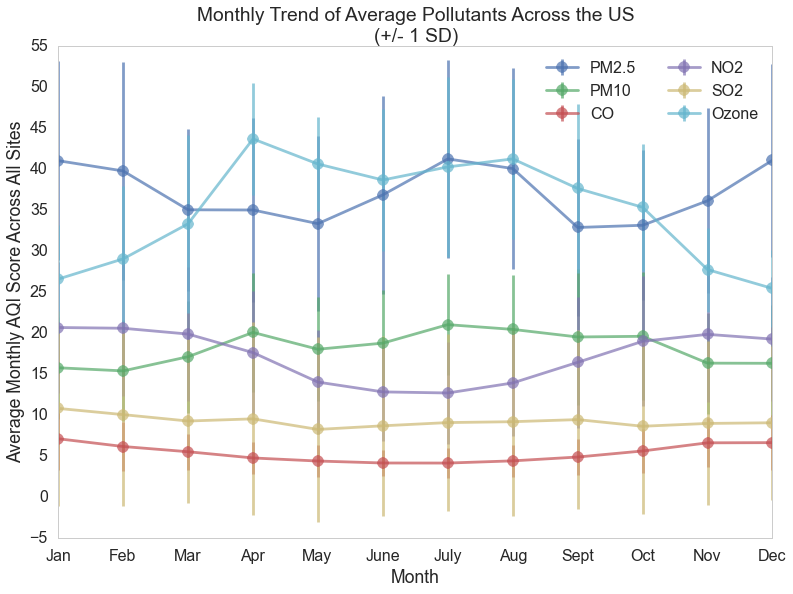

In [14]:
#Visualize the average pollutants monthly
#group all sites by month
group = MonthDat.groupby('month')
#Get the mean and sd over each month
plotVals = group.mean()
plotError = group.std()
#Initiate a plot and fill in the relevant info
fig, ax1 = plt.subplots()
plt.locator_params(nbins=12)
plt.grid(False)
plt.errorbar(plotVals.index,plotVals.AQI_PM25_FRMFEM, yerr=plotError.AQI_PM25_FRMFEM,label='PM2.5',alpha=.7,fmt='o-')
plt.errorbar(plotVals.index,plotVals.AQI_PM10, yerr=plotError.AQI_PM10,label='PM10',alpha=.7,fmt='o-')
plt.errorbar(plotVals.index,plotVals.AQI_CO, yerr=plotError.AQI_CO,label='CO',alpha=.7,fmt='o-')
plt.errorbar(plotVals.index,plotVals.AQI_NO2, yerr=plotError.AQI_NO2,label='NO2',alpha=.7,fmt='o-')
plt.errorbar(plotVals.index,plotVals.AQI_SO2, yerr=plotError.AQI_SO2,label='SO2',alpha=.7,fmt='o-')
plt.errorbar(plotVals.index,plotVals.AQI_OZONE, yerr=plotError.AQI_OZONE,label='Ozone',alpha=.7,fmt='o-')
#Format legend, axes, and title
ax1.set_xticklabels(('Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'))
ax1.set_xlabel('Month')
ax1.set_ylabel("Average Monthly AQI Score Across All Sites")
ax1.legend(loc='upper right',ncol=2)
plt.title('Monthly Trend of Average Pollutants Across the US\n(+/- 1 SD)')

For the most part, things look farily consistent. We see slight increases in PM10 and Ozone in the summer months -- this makes sense as ozone levels are increased when it is hotter, especially during heatwaves and PM10 is affected similarly. $NO_2$ seems to generally be slighly higher in the winter months. This also makes a sense as $NO_2$ is primarly emitted from fuel combustion and transportation, both of which are likely higher in the colder winter months.

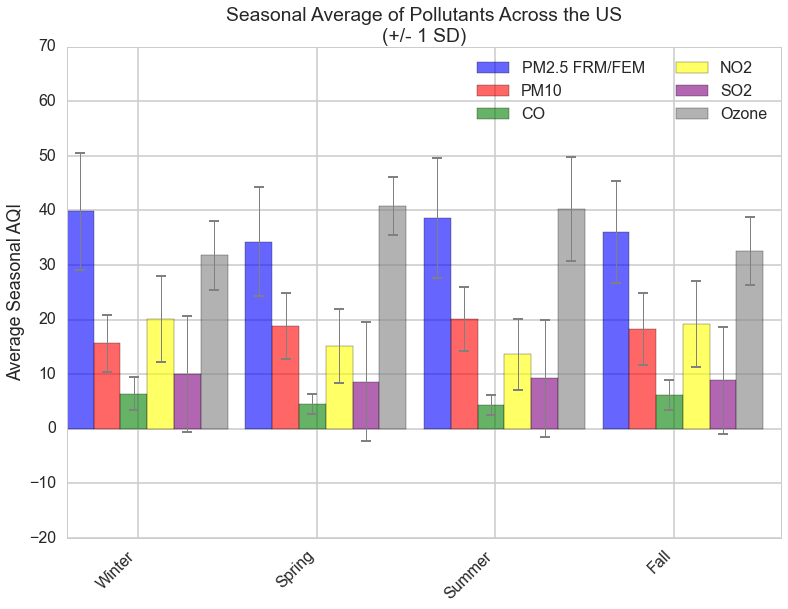

In [16]:
#Visualize the average pollutants by season
#Group by season
group = SeasonDat.groupby('season')
#Get group means and sd
plotVals = group.mean()
plotError = group.std()
#Intiate plots
fig, ax1 = plt.subplots()
#set the x-axis locations
x=[0,1,2,3]
#Plot bars and errors for each pollutant
pm25_bar=plt.bar(x,[float(plotVals[plotVals.index=='Winter']['AQI_PM25_FRMFEM']),float(plotVals[plotVals.index=='Spring']['AQI_PM25_FRMFEM']),
 float(plotVals[plotVals.index=='Summer']['AQI_PM25_FRMFEM']),float(plotVals[plotVals.index=='Fall']['AQI_PM25_FRMFEM'])],
                  width=.15,color='blue',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_PM25_FRMFEM']),float(plotError[plotError.index=='Spring']['AQI_PM25_FRMFEM']),
 float(plotError[plotError.index=='Summer']['AQI_PM25_FRMFEM']),float(plotError[plotError.index=='Fall']['AQI_PM25_FRMFEM'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

pm10_bar=plt.bar([i+.15 for i in x],[float(plotVals[plotVals.index=='Winter']['AQI_PM10']),float(plotVals[plotVals.index=='Spring']['AQI_PM10']),
 float(plotVals[plotVals.index=='Summer']['AQI_PM10']),float(plotVals[plotVals.index=='Fall']['AQI_PM10'])],
                  width=.15,color='red',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_PM10']),float(plotError[plotError.index=='Spring']['AQI_PM10']),
 float(plotError[plotError.index=='Summer']['AQI_PM10']),float(plotError[plotError.index=='Fall']['AQI_PM10'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

co_bar=plt.bar([i+.3 for i in x],[float(plotVals[plotVals.index=='Winter']['AQI_CO']),float(plotVals[plotVals.index=='Spring']['AQI_CO']),
 float(plotVals[plotVals.index=='Summer']['AQI_CO']),float(plotVals[plotVals.index=='Fall']['AQI_CO'])],
                  width=.15,color='green',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_CO']),float(plotError[plotError.index=='Spring']['AQI_CO']),
 float(plotError[plotError.index=='Summer']['AQI_CO']),float(plotError[plotError.index=='Fall']['AQI_CO'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

no2_bar=plt.bar([i+.45 for i in x],[float(plotVals[plotVals.index=='Winter']['AQI_NO2']),float(plotVals[plotVals.index=='Spring']['AQI_NO2']),
 float(plotVals[plotVals.index=='Summer']['AQI_NO2']),float(plotVals[plotVals.index=='Fall']['AQI_NO2'])],
                  width=.15,color='yellow',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_NO2']),float(plotError[plotError.index=='Spring']['AQI_NO2']),
 float(plotError[plotError.index=='Summer']['AQI_NO2']),float(plotError[plotError.index=='Fall']['AQI_NO2'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

so2_bar=plt.bar([i+.6 for i in x],[float(plotVals[plotVals.index=='Winter']['AQI_SO2']),float(plotVals[plotVals.index=='Spring']['AQI_SO2']),
 float(plotVals[plotVals.index=='Summer']['AQI_SO2']),float(plotVals[plotVals.index=='Fall']['AQI_SO2'])],
                  width=.15,color='purple',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_SO2']),float(plotError[plotError.index=='Spring']['AQI_SO2']),
 float(plotError[plotError.index=='Summer']['AQI_SO2']),float(plotError[plotError.index=='Fall']['AQI_SO2'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

ozone_bar=plt.bar([i+.75 for i in x],[float(plotVals[plotVals.index=='Winter']['AQI_OZONE']),float(plotVals[plotVals.index=='Spring']['AQI_OZONE']),
 float(plotVals[plotVals.index=='Summer']['AQI_OZONE']),float(plotVals[plotVals.index=='Fall']['AQI_OZONE'])],
                  width=.15,color='grey',alpha=.6,yerr=[float(plotError[plotError.index=='Winter']['AQI_OZONE']),float(plotError[plotError.index=='Spring']['AQI_OZONE']),
 float(plotError[plotError.index=='Summer']['AQI_OZONE']),float(plotError[plotError.index=='Fall']['AQI_OZONE'])],error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=2))

#Clean up the axes
plt.xticks([i+.4 for i in x],['Winter','Spring','Summer','Fall'],rotation=45,ha='right')
ax1.set_ylim(-20,70)
plt.ylabel('Average Seasonal AQI')
plt.legend((pm25_bar,pm10_bar,co_bar,no2_bar,so2_bar,ozone_bar),('PM2.5 FRM/FEM','PM10','CO','NO2','SO2','Ozone'),ncol=2)
plt.title('Seasonal Average of Pollutants Across the US\n(+/- 1 SD)')

In general, it appears that there are not terribly strong seasonal and monthly changes based on this data. This suggets that it may just be easiest to look at yearly average for each site. Before doing so, it probably is good to get a sense of the potential predictors of these air pollutants. Weather patterns probably have stronger seasonal variation which we may miss by aggregating the yearly level.

Given the fairly consistent seasonality of the pollutants, let's see how the different measures correlate with one another when averaging across the whole year.

Correlation Between OZONE and PM10: 0.0287011702891 (p=0.680688000502)
Correlation Between OZONE and PM25_FRMFEM: -0.0695559512412 (p=0.224282391065)
Correlation Between OZONE and SO2: 0.165851880628 (p=0.032190408189)
Correlation Between PM10 and PM25_FRMFEM: 0.360217553036 (p=3.09582904393e-08)
Correlation Between PM10 and SO2: 0.0949760968437 (p=0.275010121956)
Correlation Between PM25_FRMFEM and SO2: 0.282720146792 (p=0.000291989783417)
Correlation Between NO2 and OZONE: -0.0395821595715 (p=0.629421650759)
Correlation Between NO2 and PM10: 0.360798210752 (p=3.32088628671e-05)
Correlation Between NO2 and PM25_FRMFEM: 0.300902850694 (p=0.000319021663199)
Correlation Between NO2 and SO2: 0.132770628106 (p=0.162854356882)
Correlation Between CO and OZONE: -0.169005577196 (p=0.0436106179851)
Correlation Between CO and PM10: 0.180403245246 (p=0.0432324988925)
Correlation Between CO and PM25_FRMFEM: -0.010052061282 (p=0.90650756402)
Correlation Between CO and NO2: 0.443945785541 (p=2.3533

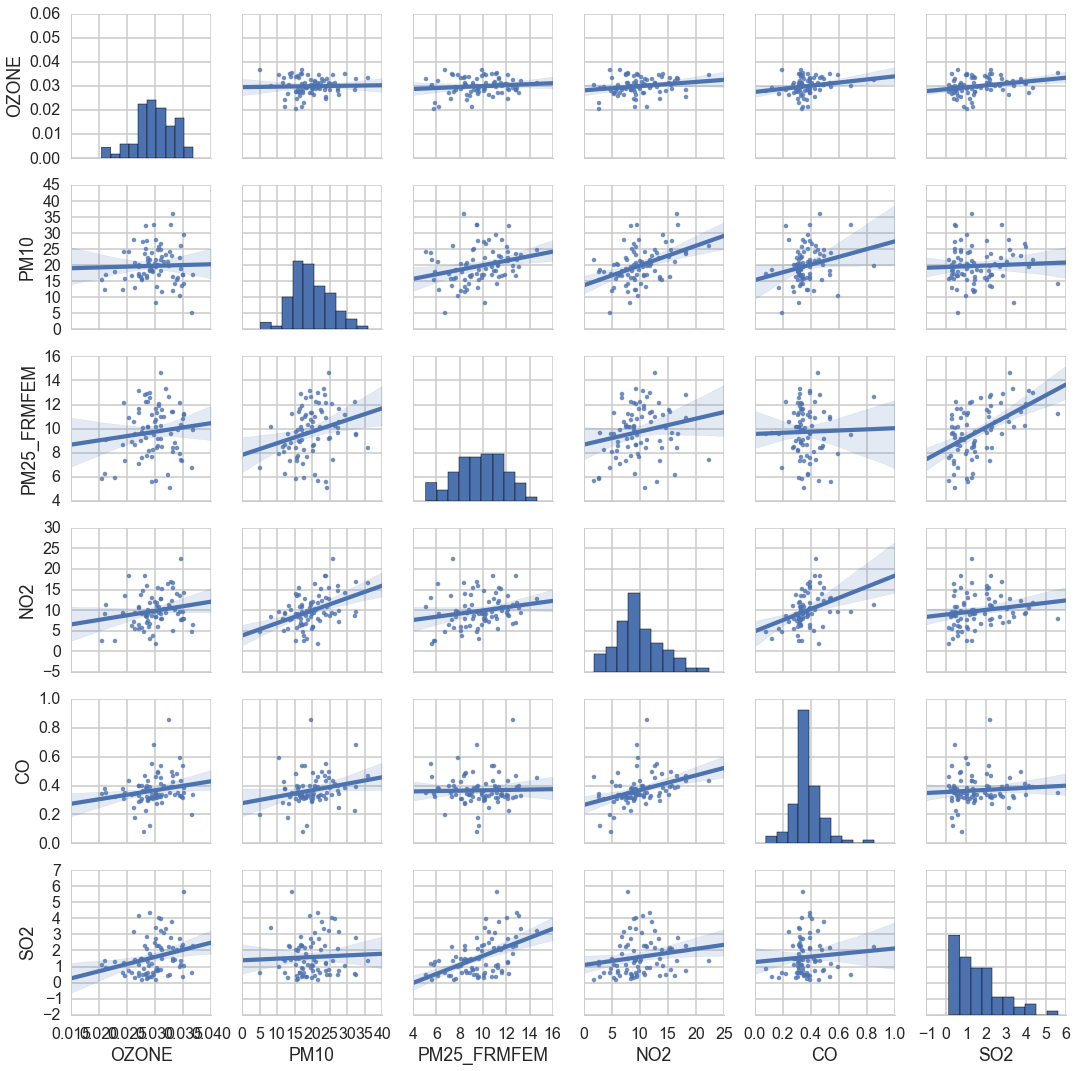

In [115]:
#Get correlations between each pair of pollutants
#list pollutants
pollutants = ['OZONE','PM10','PM25_FRMFEM','NO2','CO','SO2']
#loop through this list twice
#keeping track of the index of each loop
count1 = 0
for i in pollutants:
    count1 += 1
    count2 = 0
    for j in pollutants:
        count2 += 1
        #When the index of the second is bigger than the first,
        #we have a unique pair
        if j > i:
            #Get non-missing arguments for each pair
            index1 = []
            index2 = []
            for p,x in enumerate(pd.notnull(YearDat[[i]]).values):
                if x[0]:
                    index1.append(p)
            for p,x in enumerate(pd.notnull(YearDat[[j]]).values):
                if x[0]:
                    index2.append(p)
            touse = list(set(index2).intersection(index1))
            #Subset the dataset to just non-missing data
            a = YearDat[[i,j]]
            a = a.loc[touse]
            #Get correlation and print info
            print 'Correlation Between '+i+' and '+j+": " +str(sp.stats.pearsonr(a[i],a[j])[0])+" (p="+str(sp.stats.pearsonr(a[i],a[j])[1])+")"
#Make a pairplot
myplot = sns.pairplot(YearDat[['OZONE','PM10','PM25_FRMFEM','NO2','CO','SO2']].dropna(),kind='reg')

Some pollutants definitely appear more correlated than others. $NO_2$ and $CO$ have a highly significant correlation of about 0.44 (p<0.01). $NO_2$ also seems fairly correlated with PM2.5 and and PM10 (r=0.30 and r=0.36, p<0.01). This suggests that perhaps three variables share similar trends and maybe have similar causes. Other pollutants are not nearly as correlated though suggesting different sources of pollution. This gives us an idea of how well we can potentially develop 'pollutant profiles' based on differences in these pollutants.

##Visualizing Prediction Data

Now that we have a pretty good idea of what our pollutant data looks like and how each pollutant relates to one another, we can move forward and look at our predictors. We want to get a sense of what this data looks like before trying to build any models that relate the two together.

Starting with the weather data we pretty much see the expected trends.

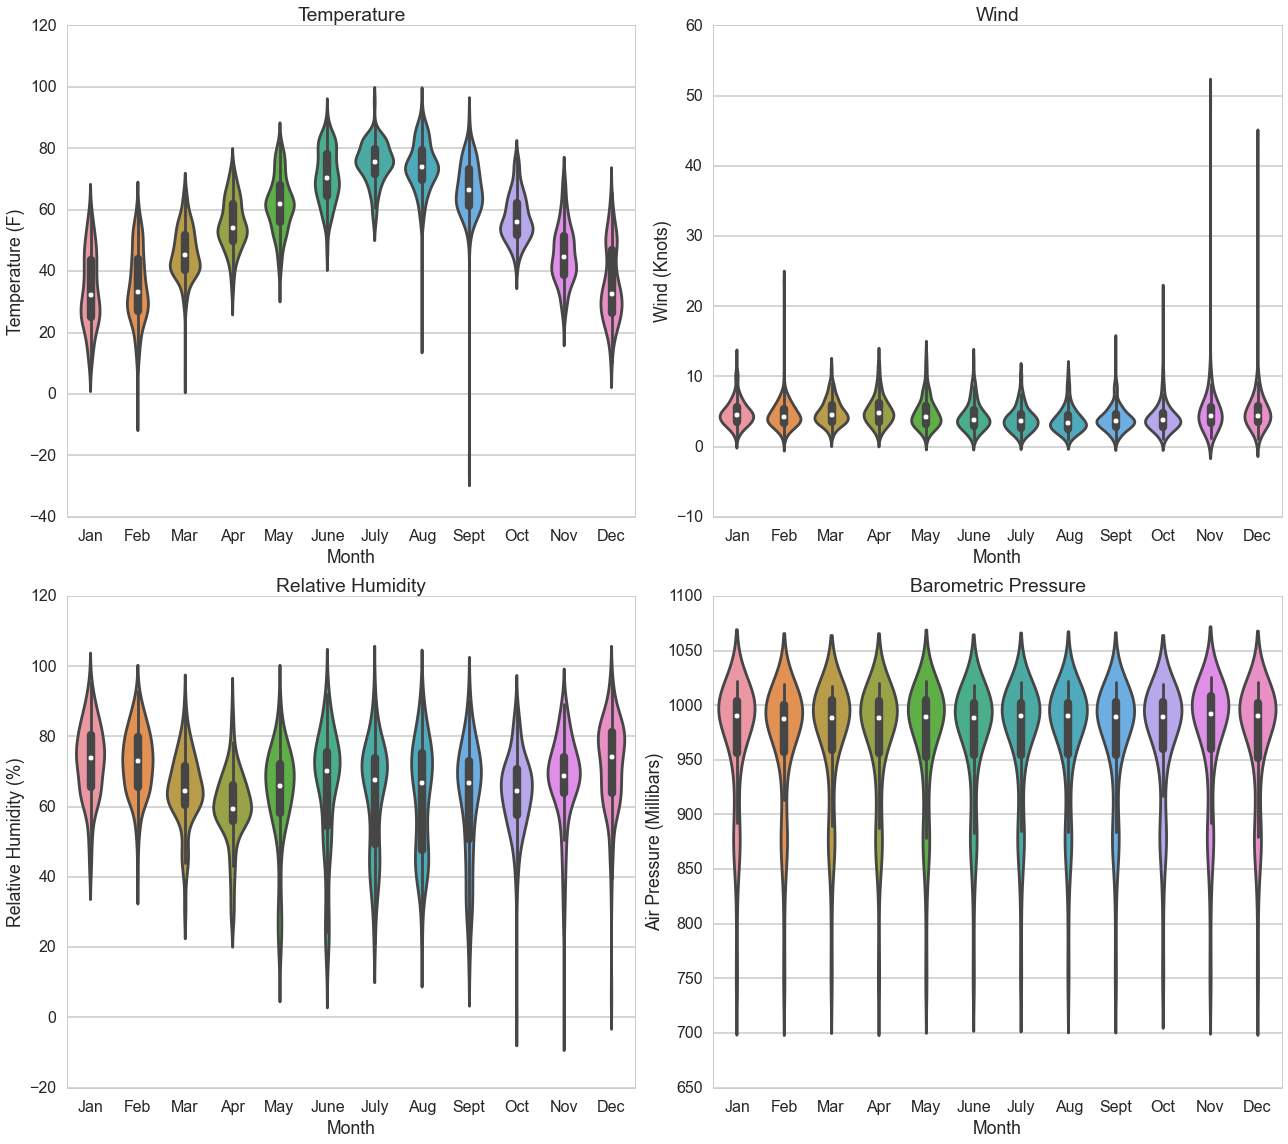

In [116]:
#Violin plots of weather data
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 16))
fig.set_tight_layout(True)
sns.violinplot(x='Month',y='TEMP',data=MonthDatMapped, ax = axes[0,0])
axes[0,0].set_title('Temperature')
axes[0,0].set_ylabel('Temperature (F)')
sns.violinplot(x='Month',y='WIND',data=MonthDatMapped, ax = axes[0,1])
axes[0,1].set_title('Wind')
axes[0,1].set_ylabel('Wind (Knots)')
sns.violinplot(x='Month',y='RH',data=MonthDatMapped, ax = axes[1,0])
axes[1,0].set_title('Relative Humidity')
axes[1,0].set_ylabel('Relative Humidity (%)')
sns.violinplot(x='Month',y='PRESS',data=MonthDatMapped, ax = axes[1,1])
axes[1,1].set_title('Barometric Pressure')
axes[1,1].set_ylabel('Air Pressure (Millibars)')

With the exception of temperature, we don't see too strong of seasonal changes in the other weather indicators. Variation does seem to have some seasonality for wind and perhaps relative humidity. This means the perhaps it's a bit strong of an assumption to look just at the overall year, but it still seems like a good place to start.

C:\Users\Mark\Anaconda\lib\site-packages\matplotlib\figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


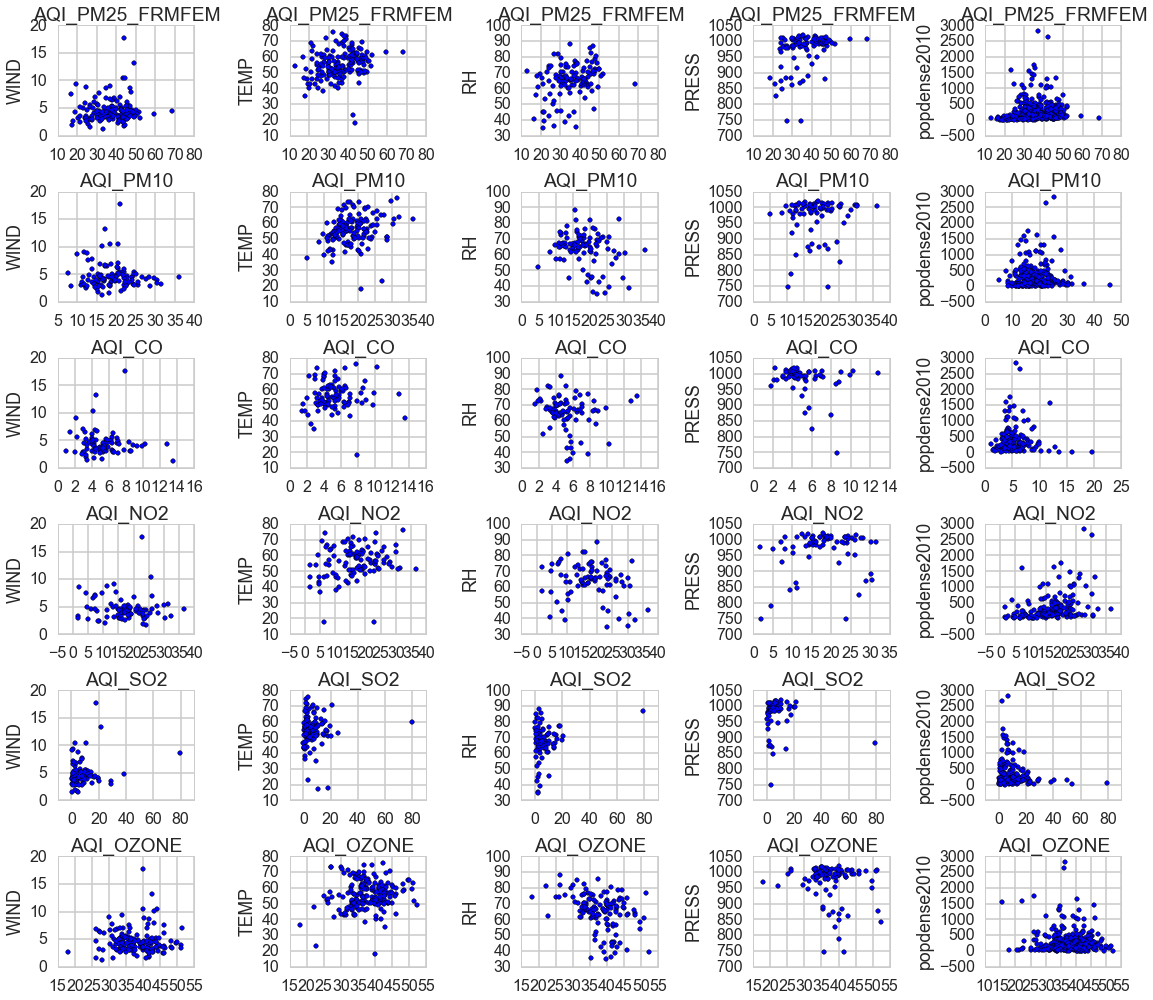

In [9]:
outcomes = ['AQI_PM25_FRMFEM',"AQI_PM10","AQI_CO","AQI_NO2",'AQI_SO2','AQI_OZONE']
predictors = ['WIND','TEMP','RH','PRESS','popdense2010']
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(16, 14), 
                         tight_layout=True)
count = 0
for pol in outcomes:
    for pred in predictors:
        ax = axes.ravel()[count]
        plotting_dat = YearDat[[pol,pred]]
        ax.scatter(plotting_dat[pol],plotting_dat[pred])
        count += 1
        ax.set_title(pol)
        ax.set_ylabel(pred)
        #ax.annotate(pol, xy=(np.min(plotting_dat[pol]), np.max(plotting_dat[pred])), fontsize=14)

In [17]:
MonthDatMapped

,CBSA Name,month,Latitude,Longitude,PM25_FRMFEM,AQI_PM25_FRMFEM,PM25_NOFRMFEM,AQI_PM25_NOFRMFEM,PM10,AQI_PM10,TEMP,PRESS,RH,DP,WIND,CO,AQI_CO,NO2,AQI_NO2,OZONE,AQI_OZONE,SO2,AQI_SO2,id,MetArea,pop2010,landarea,popdense2010,pop_weight2010,alone,alone_frac,carpool,carpool_frac,other,other_frac,pt,pt_frac,total_trans,Month
0,"Aberdeen, SD",1,45.462500,-98.486111,12.340000,46.800000,NaN,NaN,14.400000,13.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan
1,"Aberdeen, SD",2,45.462500,-98.486111,16.033333,56.666667,NaN,NaN,21.000000,19.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feb
2,"Aberdeen, SD",3,45.462500,-98.486111,10.533333,40.444444,NaN,NaN,17.400000,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar
3,"Aberdeen, SD",4,45.462500,-98.486111,7.520000,31.200000,NaN,NaN,24.800000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr
4,"Aberdeen, SD",5,45.462500,-98.486111,6.050000,25.400000,NaN,NaN,20.800000,19.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May
5,"Aberdeen, SD",6,45.462500,-98.486111,6.840000,28.500000,NaN,NaN,21.200000,19.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
6,"Aberdeen, SD",7,45.462500,-98.486111,8.409091,34.909091,NaN,NaN,21.000000,19.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July
7,"Aberdeen, SD",8,45.462500,-98.486111,9.200000,38.400000,NaN,NaN,25.200000,23.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aug
8,"Aberdeen, SD",9,45.462500,-98.486111,4.022222,16.777778,NaN,NaN,12.333333,11.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sept
9,"Aberdeen, SD",10,45.462500,-98.486111,7.550000,30.700000,NaN,NaN,30.166667,28.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10100,Micropolitan Statistical Area,40602,2838.9,14.3,934.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oct
